Problem Statement:
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It
helps a business to better understand its customers and makes it easier for them to
modify products according to the specific needs, behaviors and concerns of different
types of customers.
Customer personality analysis helps a business to modify its product based on its target
customers from different types of customer segments. For example, instead of spending
money to market a new product to every customer in the company’s database, a
company can analyze which customer segment is most likely to buy the product and then
market the product only on that particular segment.
The main objective here is -
1. What people say about your product: what gives customers’ attitude towards the
product.
2. What people do: which reveals what people are doing rather than what they are
saying about your product.



In [1]:
import pandas as pd #analysis
import numpy as np  #computational ability
import seaborn as sns 
import matplotlib.pyplot as plt #visualization
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data set
df=pd.read_csv("C:\\Users\\saipr\\anaconda3\\ineuron\\marketing_campaign.csv",sep=';')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

since there are some missing values in income we will check that column and replace missing values with mean or median

<Axes: xlabel='Income', ylabel='Density'>

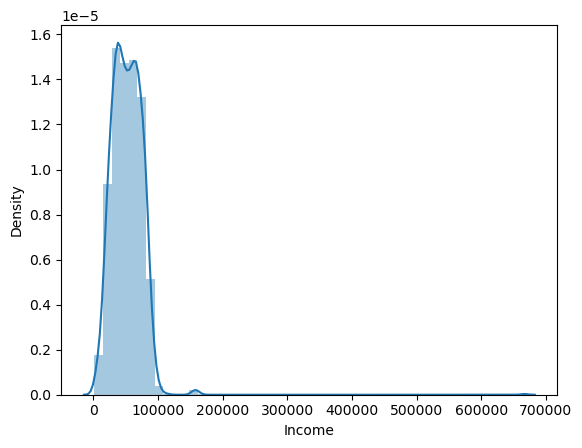

In [11]:
sns.distplot(df['Income'])

Since the data is left skewed we will replace the missing values with median

In [12]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES
df['Income']=df['Income'].fillna(df['Income'].median())

In [15]:
#Check for duplicate values
df.duplicated().sum()

0

In [17]:
#FINDING NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:In above cell Z_CostContact and Z_Revenue have same value in all the rows that's why,they are not going to contribute anything in the model building.So we can drop them

In [18]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'],axis=1)

In [19]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


## Univariate Analysis

1.Analysis on Year_Birth Variable

In [20]:
#CHECK THE NUMBER OF UNIQUE CATEGORIES PRESENT IN THE YEAR_BIRTH
print("Unique categories present in year_birth feature",df['Year_Birth'].value_counts())

Unique categories present in year_birth feature Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


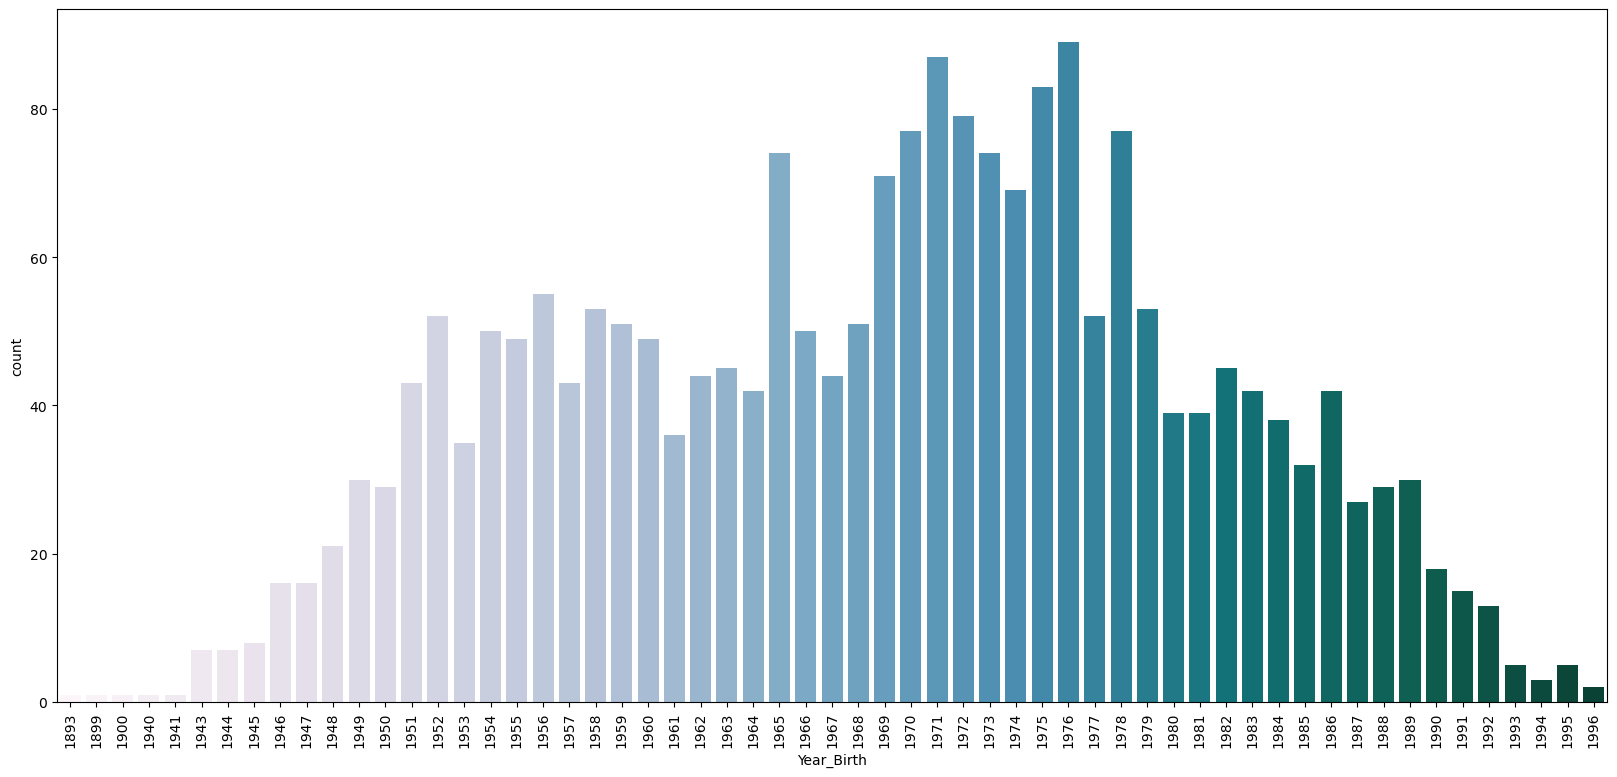

In [35]:

plt.figure(figsize=(20,9))
sns.countplot(x=df['Year_Birth'],palette='PuBuGn')
plt.xticks(rotation=90)
plt.show()


Data points in year birth are uniformly distributed

2.Analysis on Education Variable

In [39]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [36]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

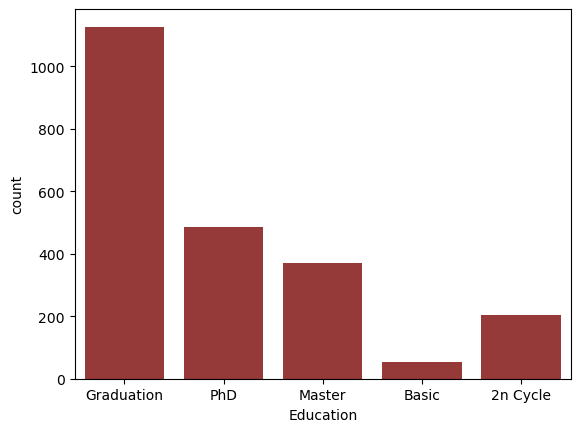

In [38]:
sns.countplot(x=df['Education'],color='brown')

In [42]:
#CHANGING CATEGORY INTO UG AND PG ONLY.....
df['Education']=df['Education'].replace(['PhD','2n Cycle','Graduation','Master'],'Post Graduate')
df['Education']=df['Education'].replace(['Basic'],'Under Graduate')

In [43]:
df['Education'].value_counts()

Education
Post Graduate     2186
Under Graduate      54
Name: count, dtype: int64

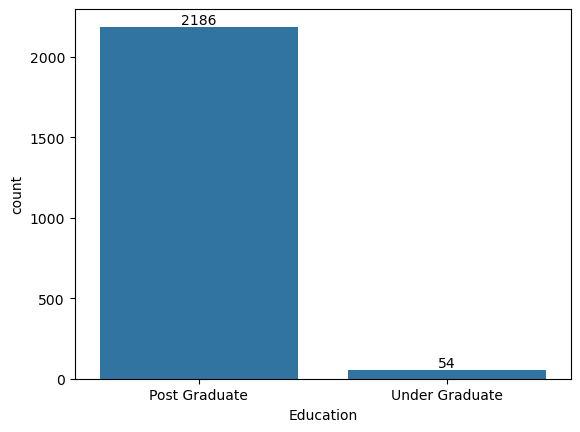

In [45]:
ax=sns.countplot(x=df['Education'])
for bars in ax.containers:
    ax.bar_label(bars)

We observed that most of the data points here are post-graduate

3.Analysis on Maritial_Status Variable

In [46]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [47]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'Relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')

In [50]:
df_marital=df['Marital_Status'].value_counts()

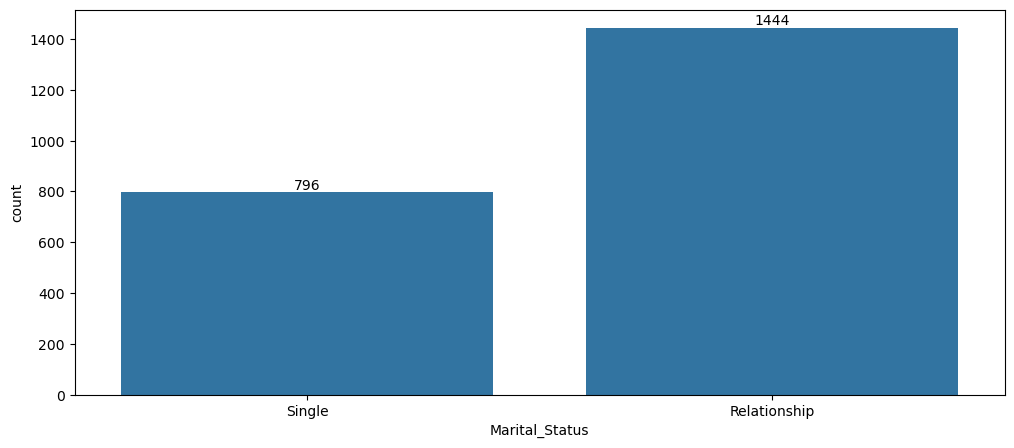

In [77]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['Marital_Status'])
for bars in ax.containers:
    ax.bar_label(bars)

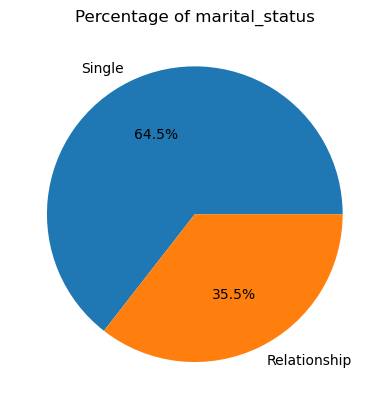

In [56]:
plt.pie(df_marital,labels=['Single','Relationship'],autopct='%1.1f%%')
plt.title("Percentage of marital_status")
plt.show()

64.46% of customers in the dataset are in 'Relationship' 35.5% of customers in the dataset are 'Single

4.Analysis on Income Variable

In [57]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

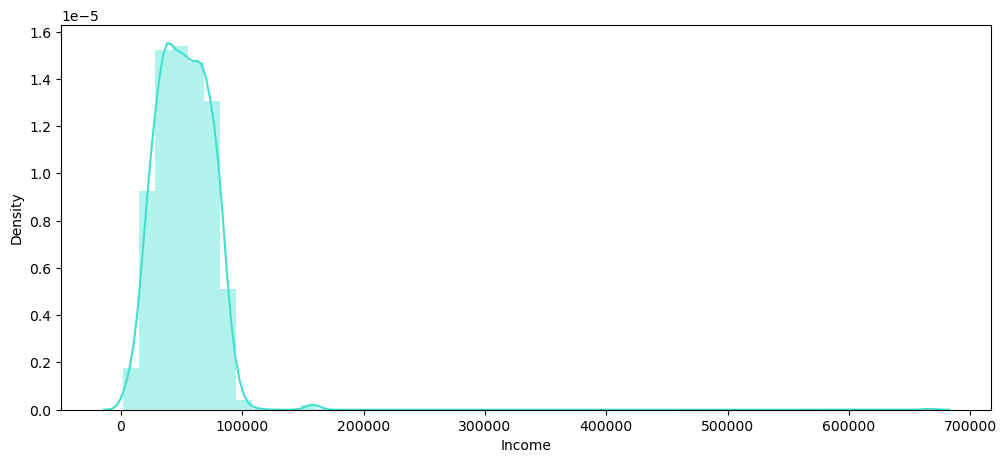

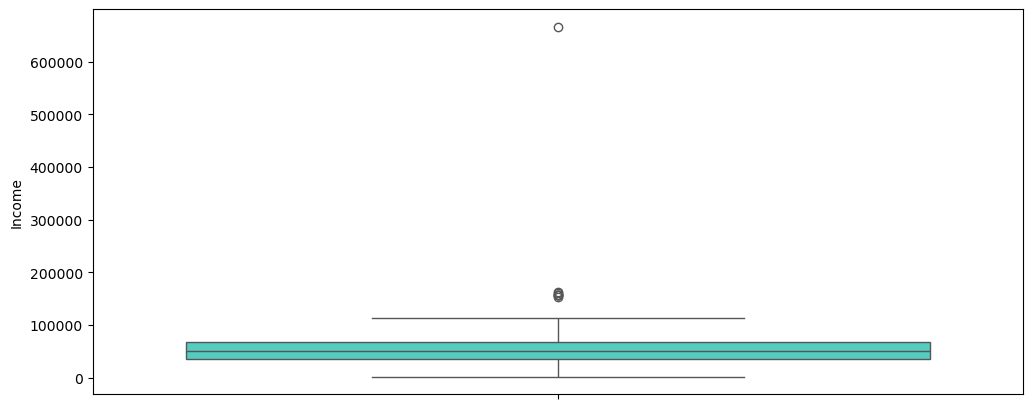

In [67]:
plt.figure(figsize=(12,5))
sns.distplot(df['Income'],color='turquoise')
plt.show()
plt.figure(figsize=(12,5))

sns.boxplot(df['Income'],color='turquoise')
plt.show()

The Income Column is Left skewed as we saw earlier but it has some outliers that we will treat it in later stage while model building

5.Analysis on "Kidhome","Teenhome" variable

In [68]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [69]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [70]:
#Combining diffetent dataframe into a single column to reduce the number of dimenssions and multicoliniarity
df['Kids']=df['Kidhome']+df['Teenhome']

In [75]:
df_kids=df['Kids'].value_counts()

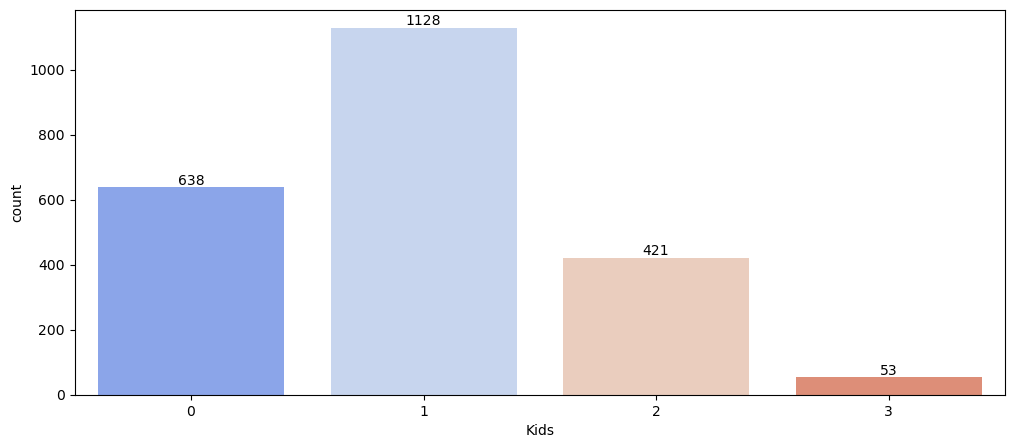

In [74]:
plt.figure(figsize=(12,5))

ax=sns.countplot(x=df['Kids'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)

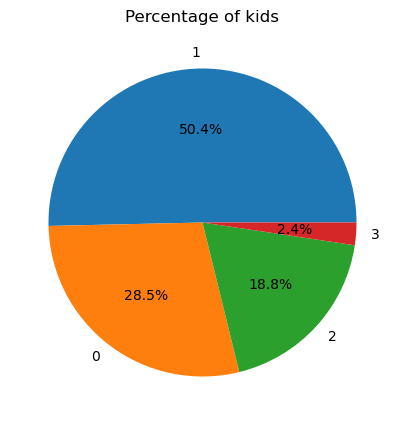

In [79]:
plt.figure(figsize=(12,5))

plt.pie(df_kids,labels=[1,0,2,3],autopct='%1.1f%%')
plt.title("Percentage of kids")
plt.show()

50.4% of customers in the dataset have 1 kid .28.5% of customers have no kids. 18.8% of customers have 2 kids 2.4% of customers in the dataset ahev 3 kids

6.Analysis on MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts Variables

In [84]:
print(df['MntWines'].nunique())
print(df['MntMeatProducts'].nunique())
print(df['MntFishProducts'].nunique())
print(df['MntSweetProducts'].nunique())
print(df['MntGoldProds'].nunique())

776
558
182
177
213


In [85]:
#Combining different dataframe into a single column to reduce the number of dimenssions
df['Expenses']=df['MntWines']+df['MntFishProducts']+df['MntFruits']+df['MntSweetProducts']+df['MntMeatProducts']+df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [86]:
df['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

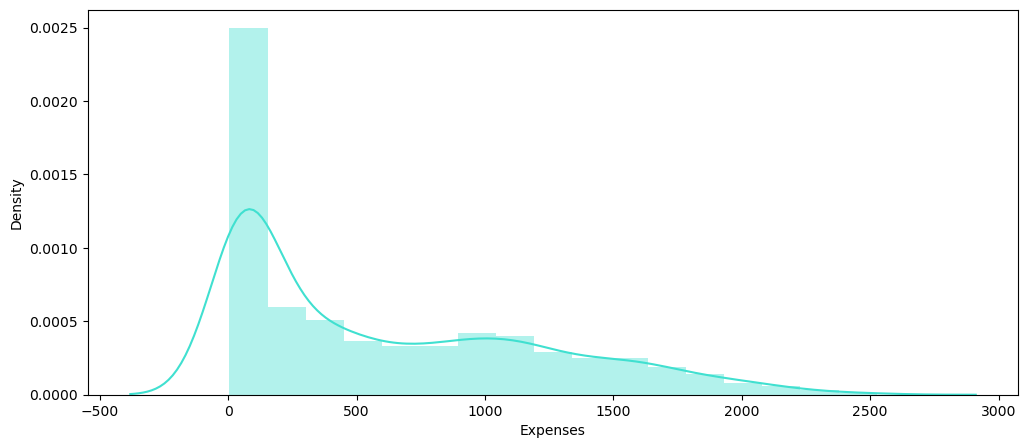

In [87]:
plt.figure(figsize=(12,5))
sns.distplot(df['Expenses'],color='turquoise')
plt.show()

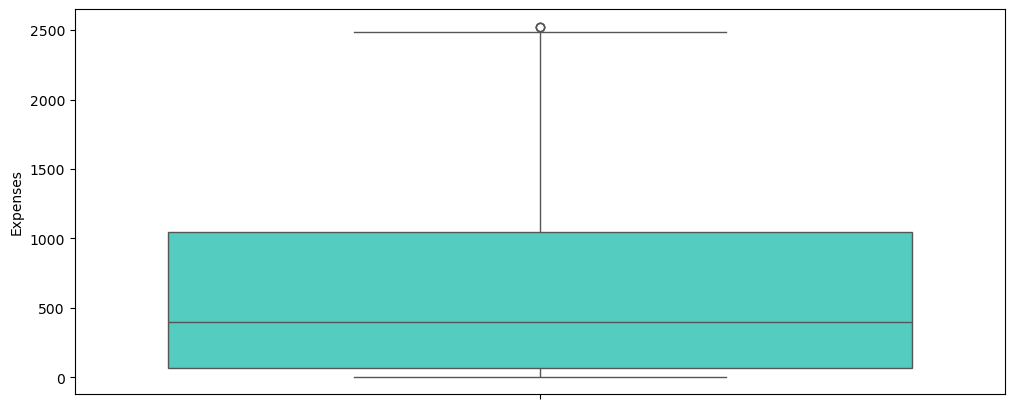

In [88]:
plt.figure(figsize=(12,5))
sns.boxplot(df['Expenses'],color='turquoise')
plt.show()

The distribution of expenses is uniform

7.Analysis on "AcceptedCmp" variables

In [89]:
df['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [90]:
df['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [91]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [92]:
#Checking number of unique categories present in the Total acceptedCmp feature
df['TotalAcceptedCmp'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

Text(0.5, 1.0, 'Frequency For Each Category in the TotalAcceptedCmp Variable')

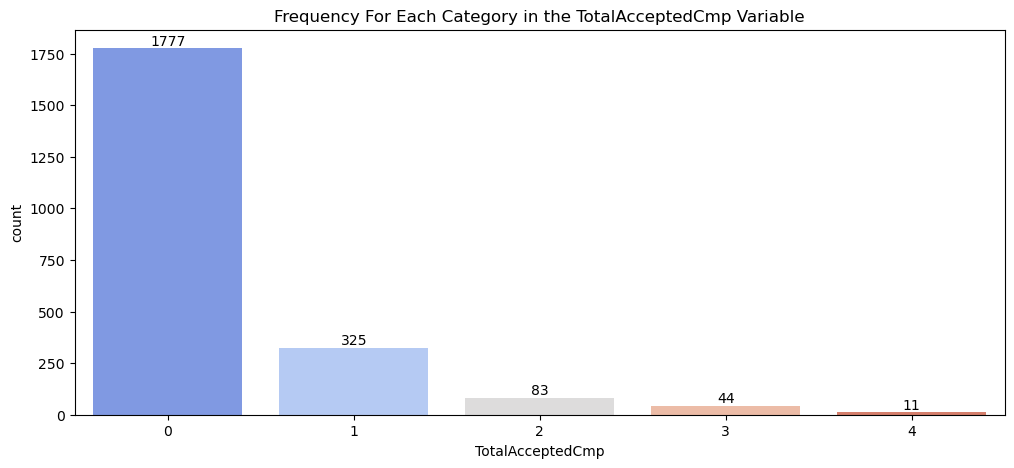

In [99]:
plt.figure(figsize=(12,5))

ax=sns.countplot(x=df['TotalAcceptedCmp'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Frequency For Each Category in the TotalAcceptedCmp Variable")

In [96]:
df_accepted=df['TotalAcceptedCmp'].value_counts()

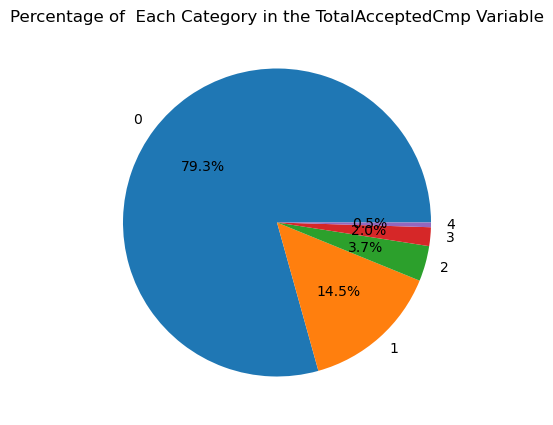

In [98]:
plt.figure(figsize=(12,5))

plt.pie(df_accepted,labels=[0,1,2,3,4],autopct='%1.1f%%')
plt.title("Percentage of  Each Category in the TotalAcceptedCmp Variable")
plt.show()

79.3% of customers accepted the offer in the campaign are "0"

8.analysis on NumWebPurchaes,NumCatalogPurchase,NumStorePurchases,NumDealsPurchases Variable

In [100]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [101]:
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

In [102]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [103]:
df['NumTotalPurchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [105]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

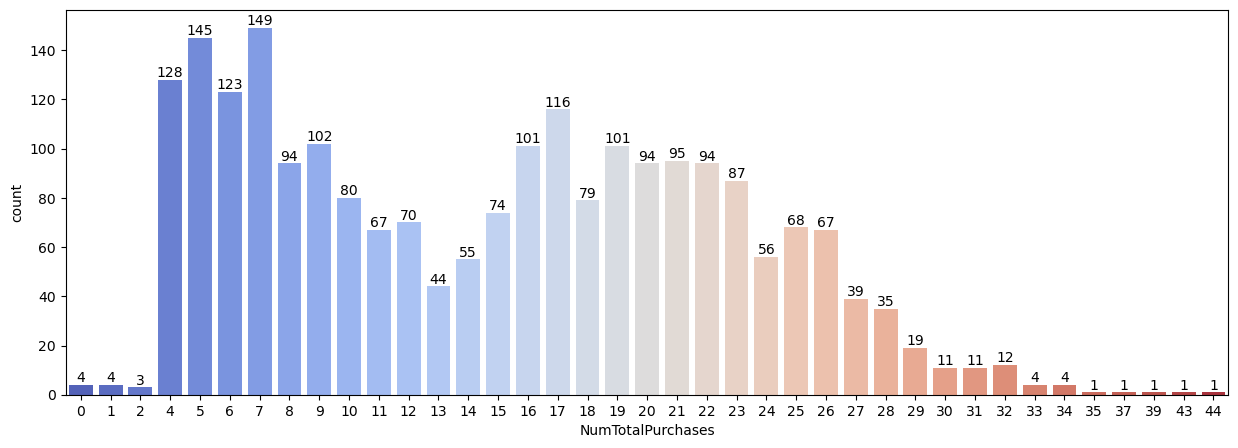

In [108]:
plt.figure(figsize=(15,5))

ax=sns.countplot(x=df['NumTotalPurchases'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)


In [109]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,19


In [110]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,19


9.Converting the Year_Birth to Customer_Age

In [111]:
df['Customer_Age']=(pd.Timestamp('now').year)-df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,70
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,59
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,40
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,43


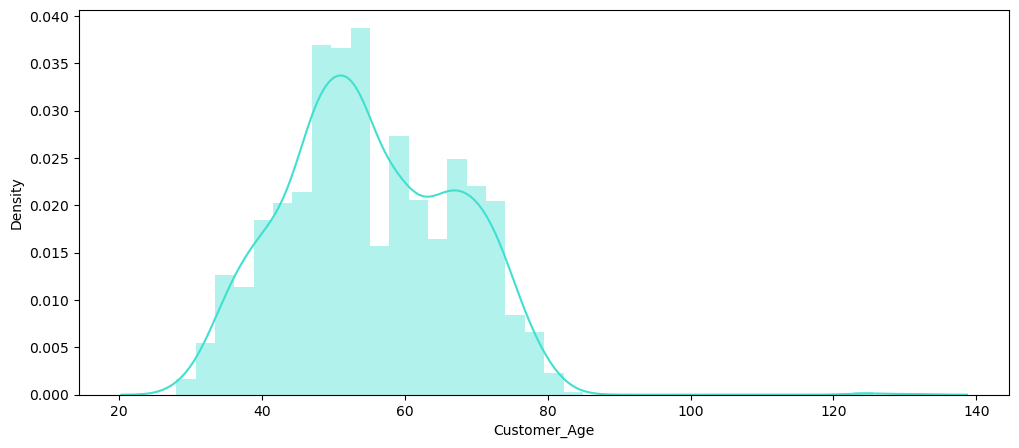

In [113]:
#Distribution of Age
plt.figure(figsize=(12,5))
sns.distplot(df['Customer_Age'],color='turquoise')
plt.show()

Most of the customers we have are in the middle age i.e between 35-55

In [114]:
#Deleting some columns to reduce Dimenssion and muliticoliniarity
col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [115]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43


In [120]:
df.columns.nunique()

12

In [121]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Complain', 'Response', 'Kids', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'Customer_Age'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   object 
 4   Recency            2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Response           2240 non-null   int64  
 7   Kids               2240 non-null   int64  
 8   Expenses           2240 non-null   int64  
 9   TotalAcceptedCmp   2240 non-null   int64  
 10  NumTotalPurchases  2240 non-null   int64  
 11  Customer_Age       2240 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 210.1+ KB


In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.



In [123]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [127]:
dates

[datetime.date(2012, 9, 4),
 datetime.date(2014, 3, 8),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 2, 10),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 5, 8),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 11, 3),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 1, 6),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 1, 11),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 1, 2),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 5, 11),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.

Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date


[ ]


In [124]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x:x.days)

In [128]:
df.tail()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
2235,Post Graduate,Relationship,61223.0,2013-06-13,46,0,0,1,1341,0,18,57,381
2236,Post Graduate,Relationship,64014.0,2014-06-10,56,0,0,3,444,1,22,78,19
2237,Post Graduate,Single,56981.0,2014-01-25,91,0,0,0,1241,1,19,43,155
2238,Post Graduate,Relationship,69245.0,2014-01-24,8,0,0,1,843,0,23,68,156
2239,Post Graduate,Relationship,52869.0,2012-10-15,40,0,1,2,172,0,11,70,622


In [126]:
df['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [129]:
df1=df.copy()

In [130]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [131]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


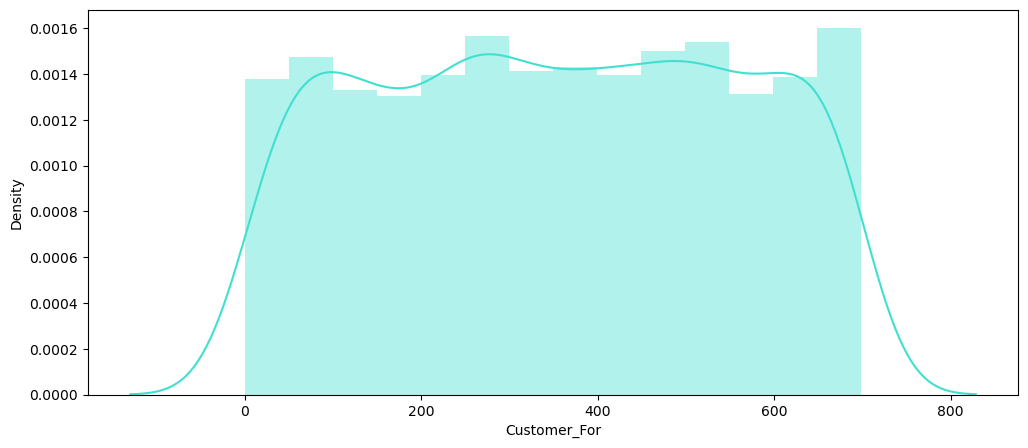

In [134]:
plt.figure(figsize=(12,5))

sns.distplot(df['Customer_For'],color='turquoise')
plt.show()

## Bivariate Analysis

1.Education vs Expenses

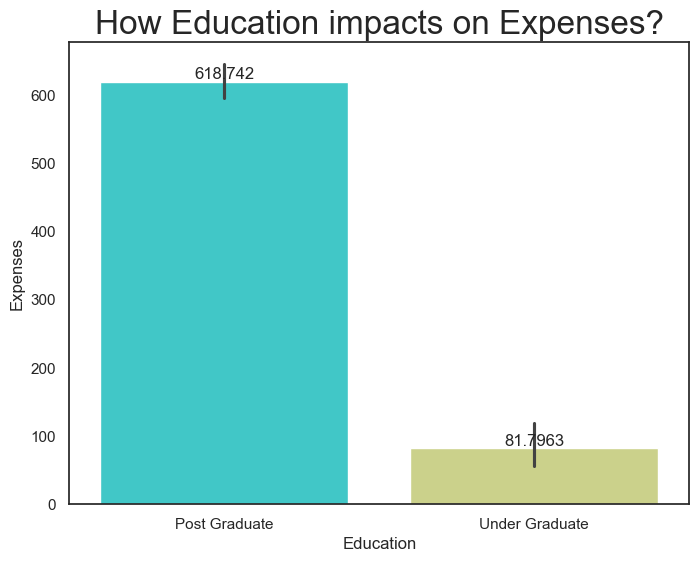

In [137]:
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")
for bars in ax.containers:
    ax.bar_label(bars)

We Observed that the Post Graduate people spends more than the UG people

2.Maritial_status vs Expenses

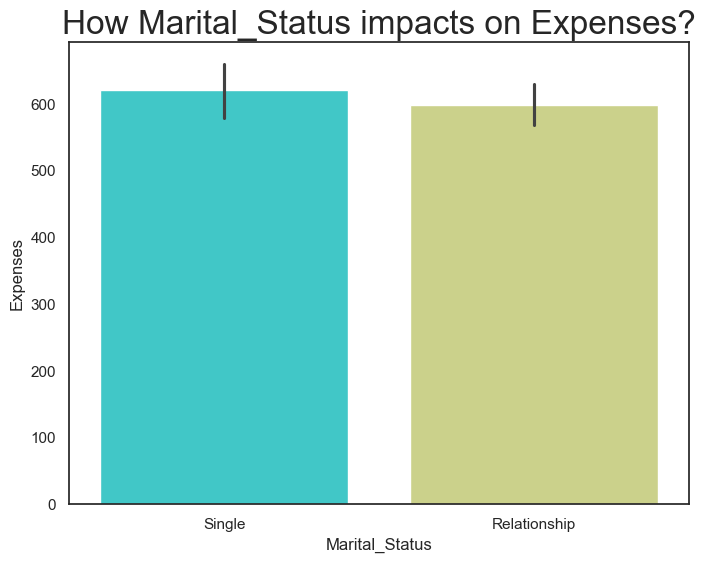

In [139]:
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")

We observe that single and married people have the same spendings

3.Kids vs Expenses


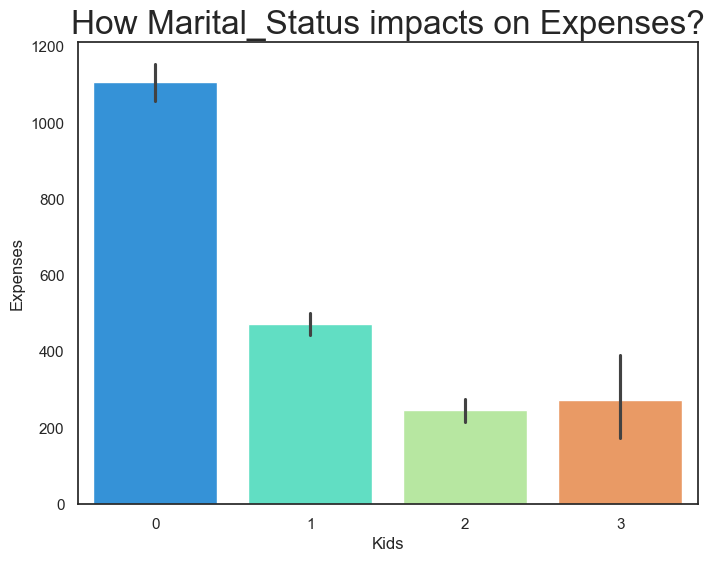

In [140]:
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")

Here we observe some thing different that parents with 1 kid spends more than the parents who are having 2 or 3 kids

4.TotalAcceptedCmp vs Expenses


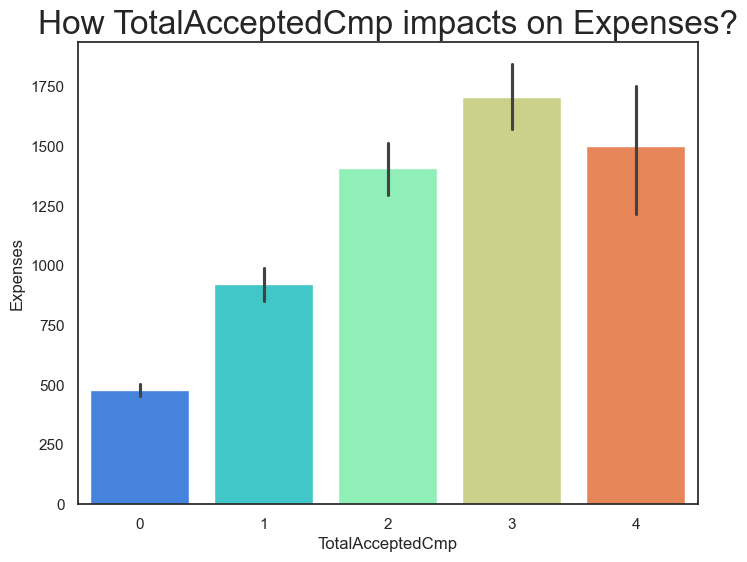

In [142]:
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow")

Those who accepeted more campaign have more expenses

5.NumTotalPurchases vs Expenses


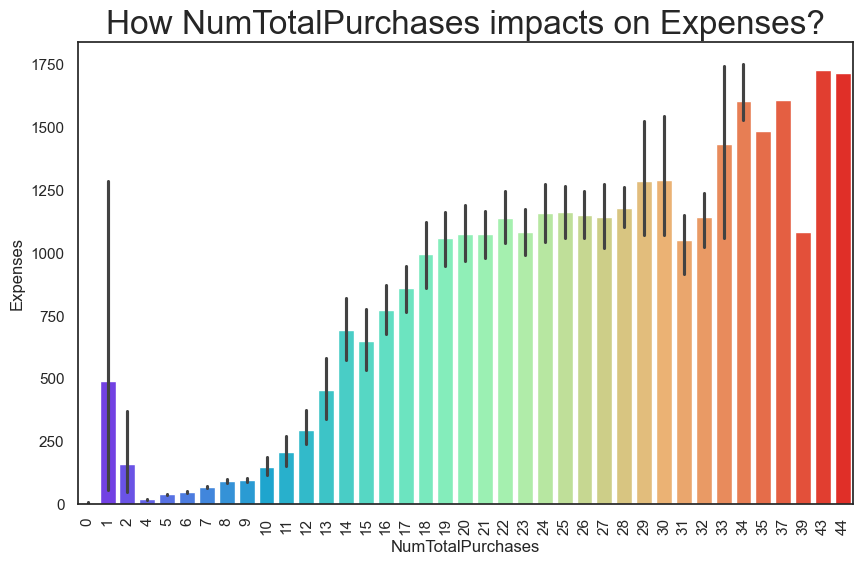

In [145]:
sns.set_theme(style="white")
plt.figure(figsize=(10,6))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="rainbow")

Those who have more purchases have more expenses

6.Day engaged vs Expences

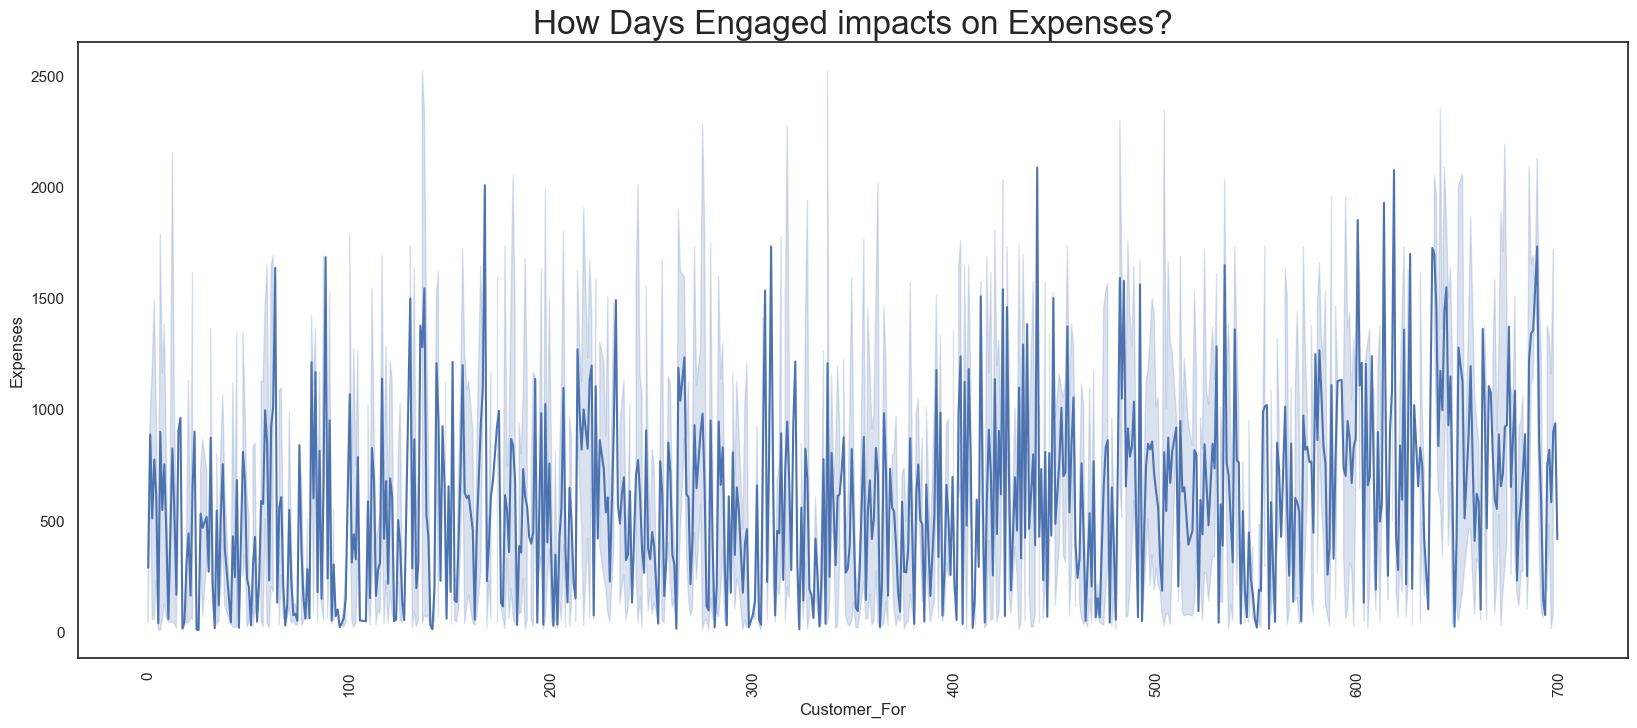

In [146]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=df,palette="rainbow")

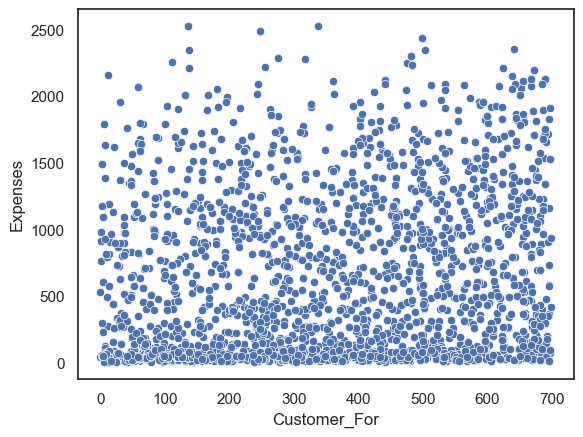

In [148]:
sns.scatterplot(x=df['Customer_For'],y=df['Expenses'])

plt.show()

No relationship between days enagaged vs expenses


7.Customer_Age vs Expenses

In [149]:
df

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161
...,...,...,...,...,...,...,...,...,...
2235,Post Graduate,Relationship,61223.0,1,1341,0,18,57,381
2236,Post Graduate,Relationship,64014.0,3,444,1,22,78,19
2237,Post Graduate,Single,56981.0,0,1241,1,19,43,155
2238,Post Graduate,Relationship,69245.0,1,843,0,23,68,156


Text(0.5, 1.0, 'How Age impacts on Expenses?')

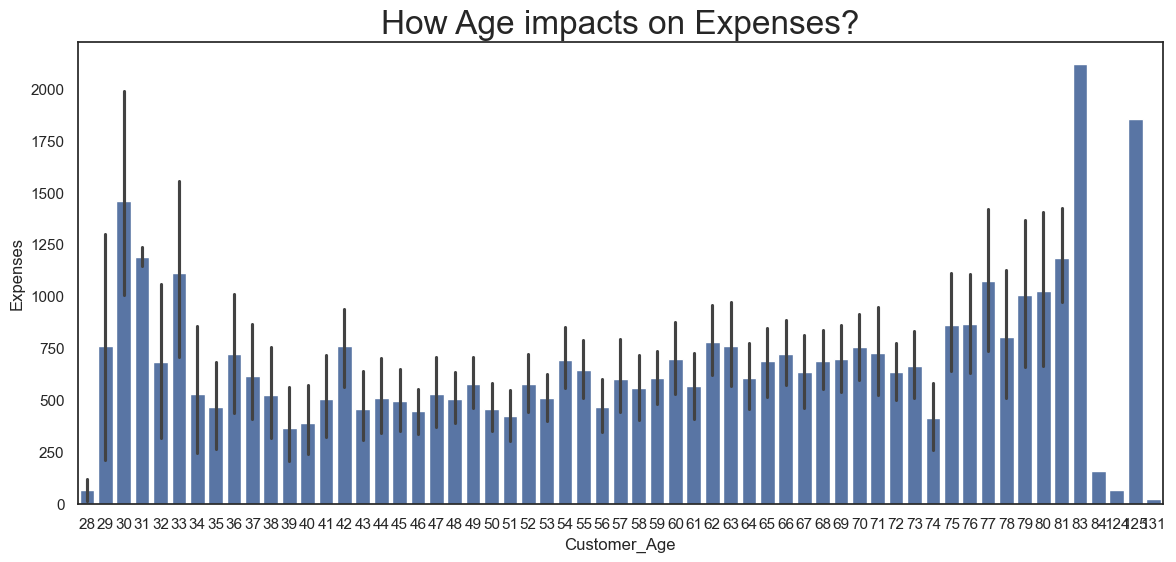

In [154]:
plt.figure(figsize=(14,6))
sns.barplot(x='Customer_Age',y='Expenses',data=df)
plt.title("How Age impacts on Expenses?",fontsize=24)


People who are in middle age have less expenses than others

Remove Some Outliers present in age and income

In [155]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [159]:
df['Customer_Age'].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Customer_Age, dtype: float64

<Axes: ylabel='Customer_Age'>

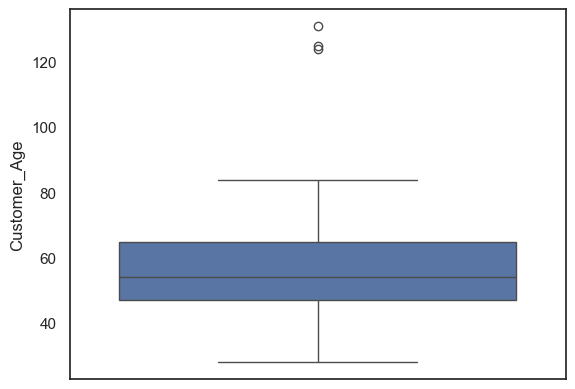

In [158]:
sns.boxplot(df['Customer_Age'])

In [160]:
df=df[df['Customer_Age']<90]
df=df[df['Income']<300000]

In [161]:
df.shape

(2236, 9)

In [162]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


## Finding The Correlation

In [163]:
df_numeric=df.select_dtypes(include='number')

In [164]:
df_numeric.corr()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
Income,1.000000,-0.340550,0.789375,0.364481,0.666325,0.198835,-0.023677
Kids,-0.340550,1.000000,-0.498579,-0.243836,-0.245976,0.095512,-0.025742
Expenses,0.789375,-0.498579,1.000000,0.458925,0.754367,0.113618,0.158764
TotalAcceptedCmp,0.364481,-0.243836,0.458925,1.000000,0.256963,-0.000164,-0.011539
NumTotalPurchases,0.666325,-0.245976,0.754367,0.256963,1.000000,0.179576,0.207080
Customer_Age,0.198835,0.095512,0.113618,-0.000164,0.179576,1.000000,-0.016451
Customer_For,-0.023677,-0.025742,0.158764,-0.011539,0.207080,-0.016451,1.000000


<Axes: >

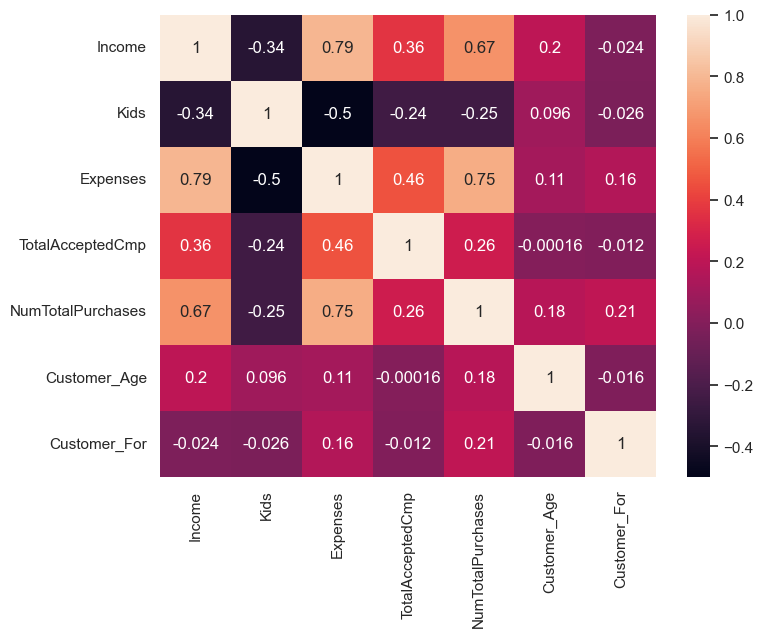

In [167]:
plt.figure(figsize=(8,6))

sns.heatmap(df_numeric.corr(),annot=True)


Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids

In [168]:
#Import Label encoder
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()
df['Education']=label_Encoder.fit_transform(df['Education'])
df['Marital_Status']=label_Encoder.fit_transform(df['Marital_Status'])

In [169]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

In [171]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,58138.0,0,1617,0,25,67,663
1,0,1,46344.0,2,27,0,6,70,113
2,0,0,71613.0,0,776,0,21,59,312
3,0,0,26646.0,1,53,0,8,40,139
4,0,0,58293.0,1,422,0,19,43,161


In [173]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col_scale=['Income','Kids','Expenses','TotalAcceptedCmp','NumTotalPurchases','Customer_Age','Customer_For']
df[col_scale]=scaler.fit_transform(df[col_scale])

In [174]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


## Model Building

In [175]:
X_0=df.copy()

In [176]:
from sklearn.cluster import KMeans


Text(0, 0.5, 'WCSS')

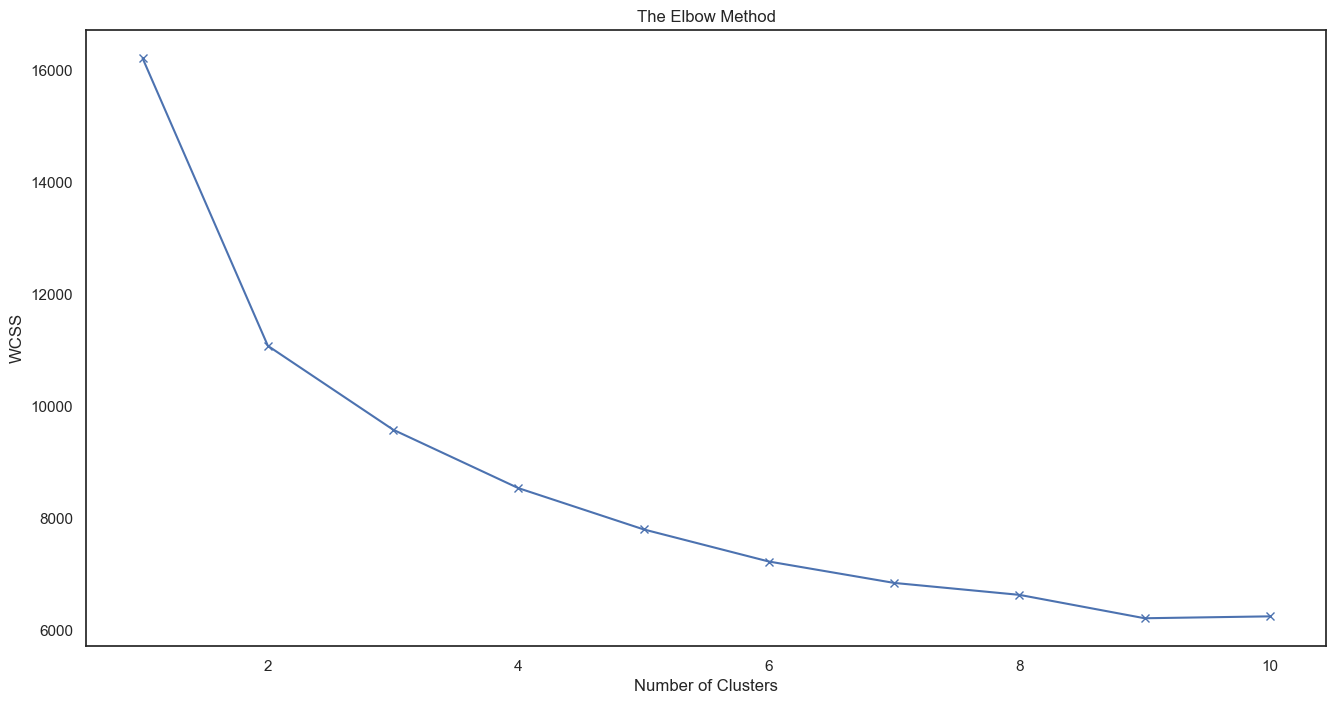

In [178]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')

We can understand from the plot that cluster=2 is the best

In [181]:
#Training and Predicting using K-means Algorithm
kmeans=KMeans(n_clusters=2,random_state=42).fit(X_0)
pred=kmeans.predict(X_0)

#Appending the cluster value into main dataframe (without standard scalar)
X_0['cluster_kmeans']=pred+1

In [182]:
X_0.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,cluster_kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793,2
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143,1
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659,2
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517,1
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679,1


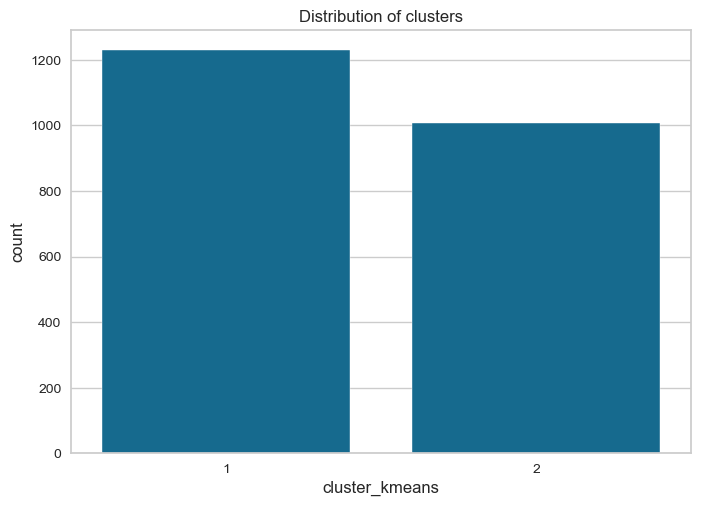

In [183]:
sns.countplot(x=X_0['cluster_kmeans'])
plt.title("Distribution of clusters")
plt.show()

<Axes: xlabel='Expenses', ylabel='Income'>

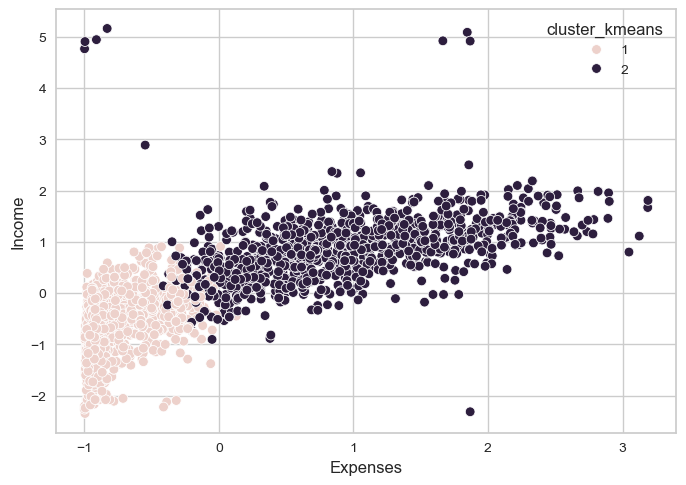

In [186]:
sns.scatterplot(x=X_0['Expenses'],y=X_0['Income'],hue=X_0['cluster_kmeans'])

## PCA with Agglomerative Clustering

In [187]:
X_1 = df.copy()

In [188]:
X_1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


In [189]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_1)
PCA_ds = pd.DataFrame(pca.transform(X_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-7.467690e-17,1.727875,-2.781513,-1.605133,-0.256193,1.383609,5.653584
col2,2236.0,2.701079e-17,1.063303,-3.637695,-0.732501,0.006992,0.792535,2.899452
col3,2236.0,-3.098297e-17,1.027762,-2.778722,-0.819979,-0.004863,0.851926,2.221347


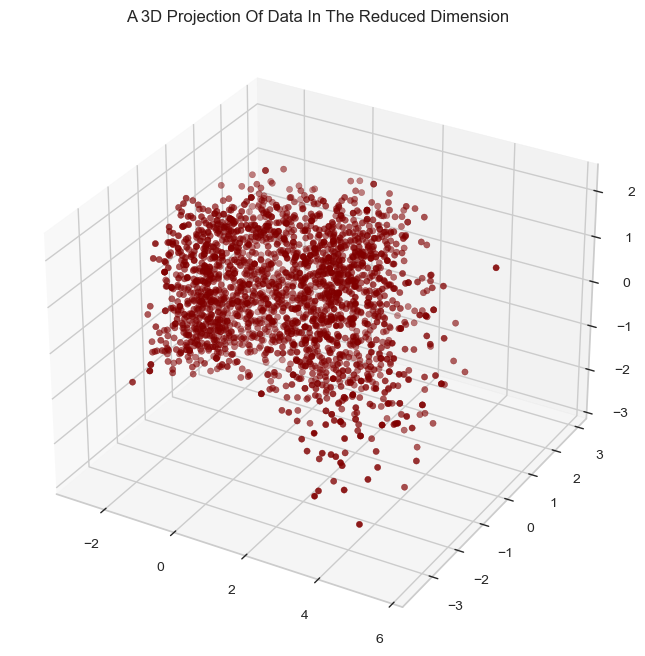

In [190]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

In [191]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


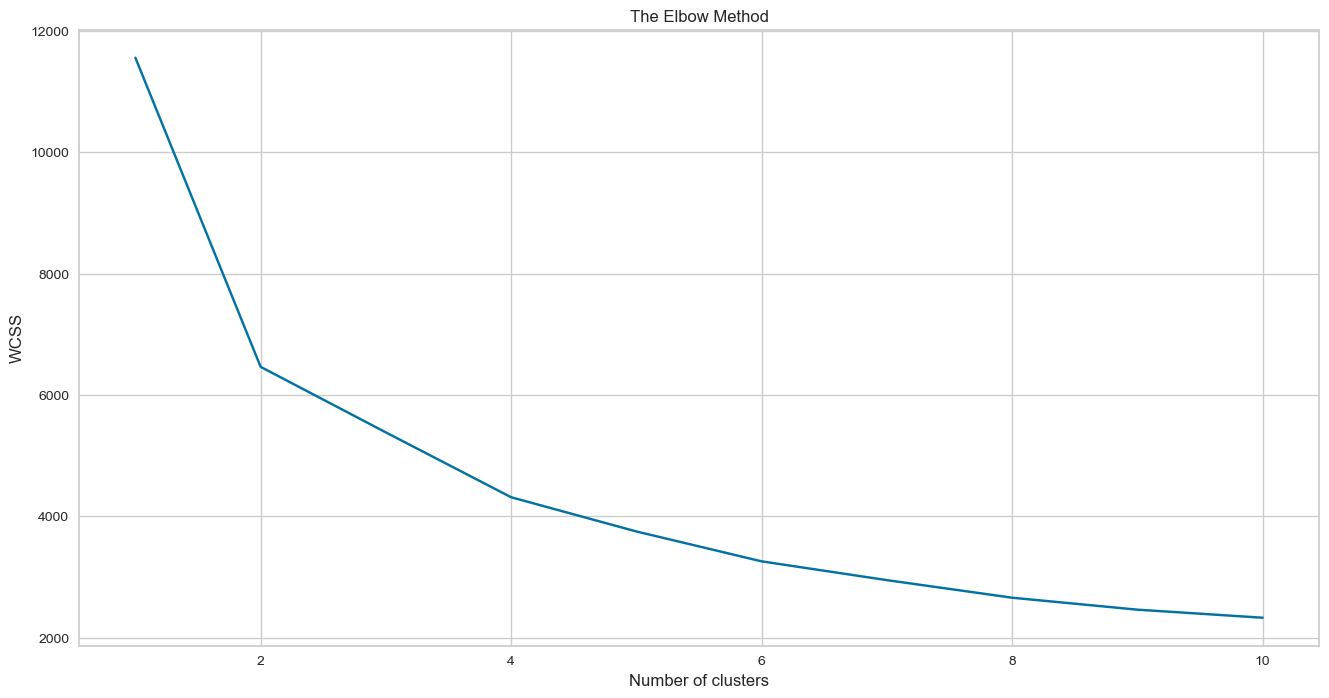

In [192]:

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS is the sum of the squared distance between each point and the centroid in a cluster.

wcss values is more less for k=2 here...so we take k=2

In [193]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
X_1["Cluster_Agglo"]= yhat_AC + 1

<Axes: xlabel='Expenses', ylabel='Income'>

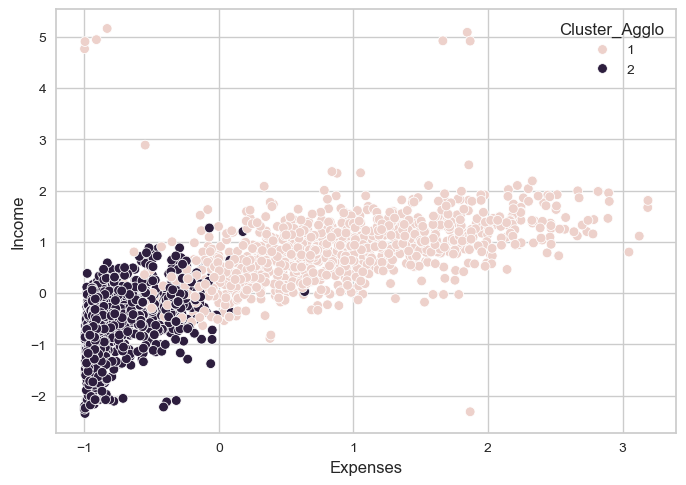

In [195]:
sns.scatterplot(x=X_1['Expenses'],y=X_1['Income'],hue=X_1['Cluster_Agglo'])

<Axes: xlabel='Kids', ylabel='Income'>

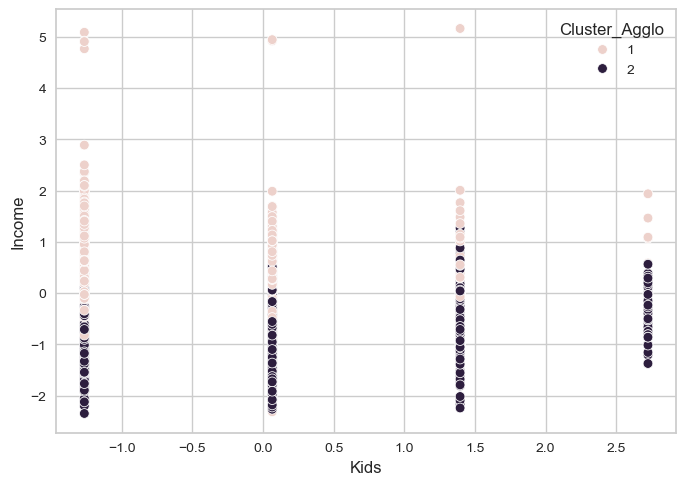

In [197]:
sns.scatterplot(x=X_1['Kids'],y=X_1['Income'],hue=X_1['Cluster_Agglo'])

<Axes: xlabel='Marital_Status', ylabel='Income'>

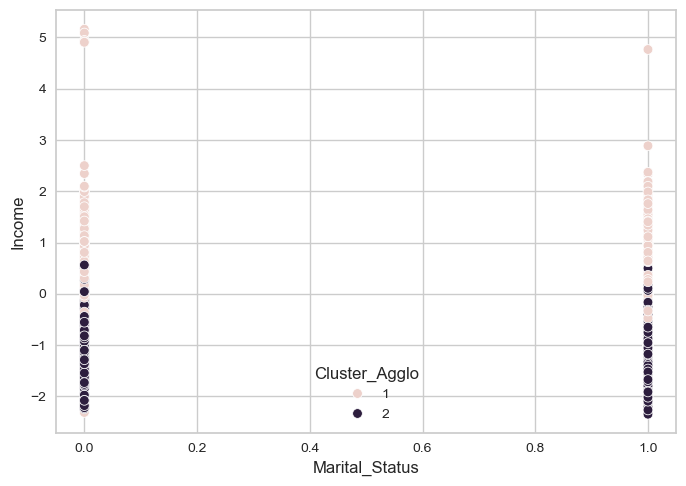

In [198]:
sns.scatterplot(x=X_1['Marital_Status'],y=X_1['Income'],hue=X_1['Cluster_Agglo'])

<Axes: xlabel='Income', ylabel='Customer_Age'>

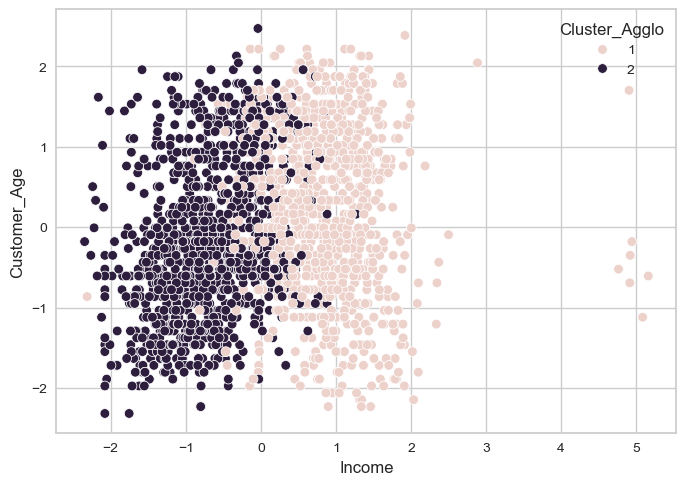

In [199]:
sns.scatterplot(x=X_1['Income'],y=X_1['Customer_Age'],hue=X_1['Cluster_Agglo'])

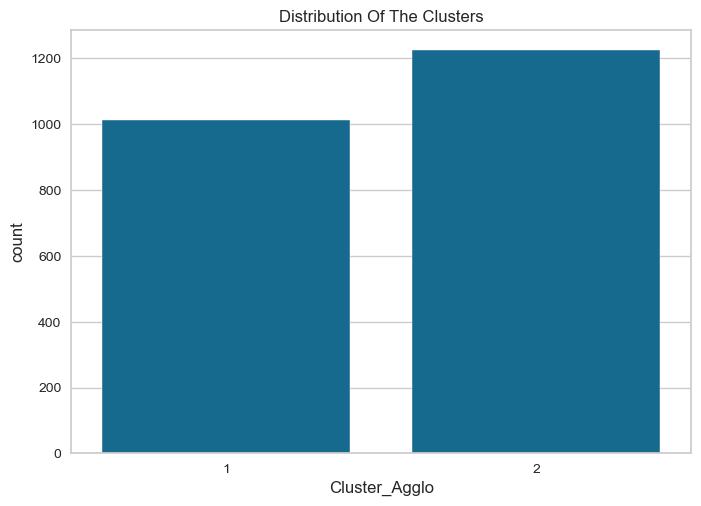

In [200]:
sns.countplot(x=X_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

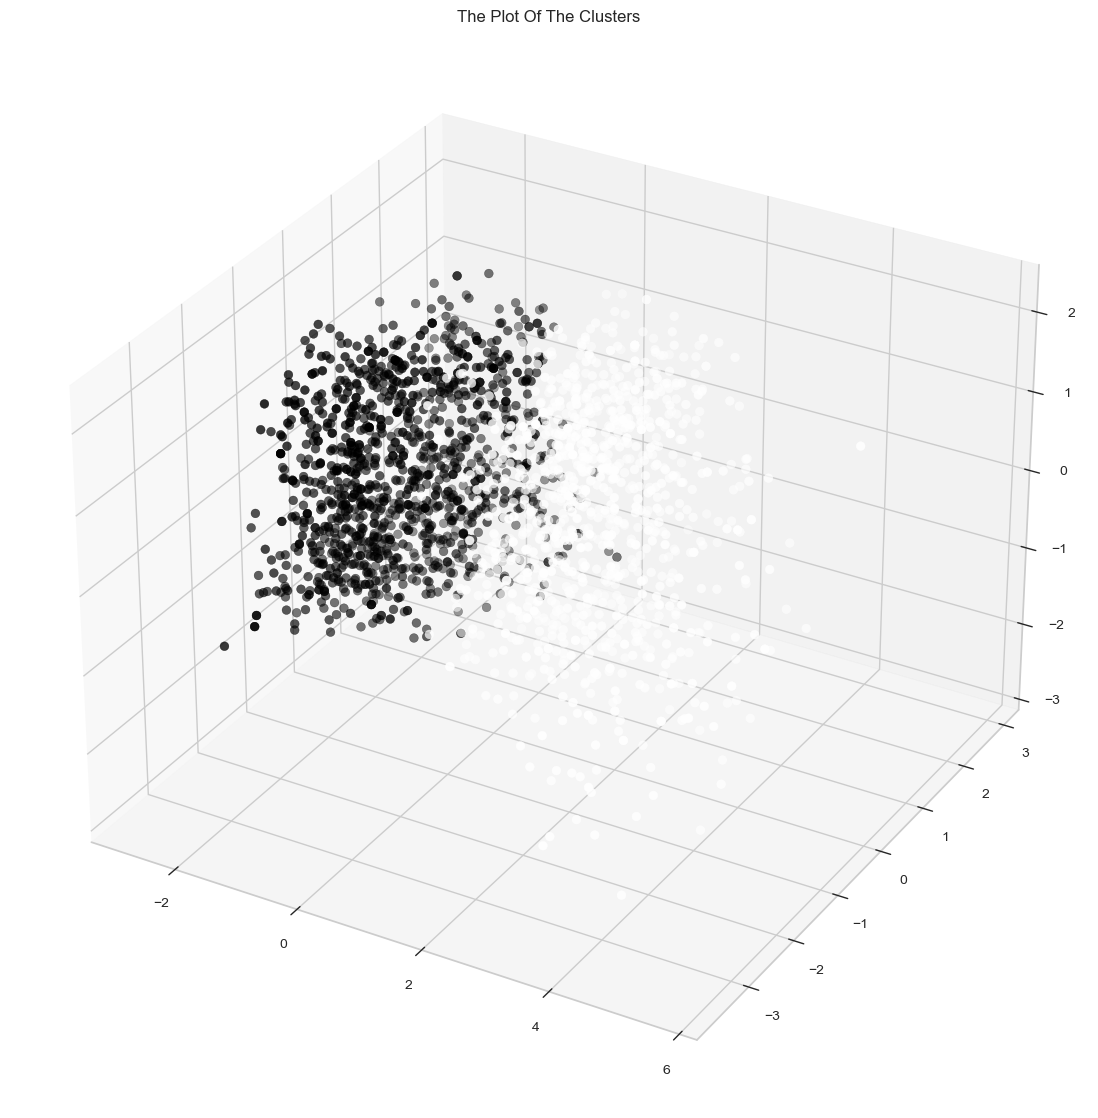

In [201]:
#Plotting the clusters
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")

plt.show()

## Conclusions

Cluster 2:

People with less expenses

people who are married and parents of more than 3 kids

people which low income




Cluster 1:

people with more expenses

people who are single or parents who have less than 3 kids

people with high income

Age is not the criteria but it is observed to some extent that people who are older fall in this group

So, the customers falling in cluster 2 likes to spend more...so the Firm's can target people falling in cluster 1 for the sale of their Products....



In [206]:
df

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679
...,...,...,...,...,...,...,...,...,...
2235,0,0,0.433060,0.065416,1.221499,-0.438933,0.407425,0.162216,0.134695
2236,0,0,0.563440,2.724862,-0.269201,1.034721,0.928519,1.956986,-1.656175
2237,0,1,0.234898,-1.264308,1.055312,1.034721,0.537699,-1.034298,-0.983362
2238,0,0,0.807803,0.065416,0.393886,-0.438933,1.058793,1.102333,-0.978415


In [211]:
import pickle
# Save the PCA model in pickle format
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)  # Dump the PCA model into the file
  # Open
 

In [212]:
with open('AC.pkl', 'wb') as f:
    pickle.dump(pca, f)  

In [213]:
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(pca, f)  